## Практическое задание 2: Линейные модели, часть 1: Регрессия

In [10]:
! pip install numpy pandas scipy matplotlib seaborn scikit-learn nltk gdown

Defaulting to user installation because normal site-packages is not writeable


In [11]:
# !!! Данный блок будет работать только в Google-Colab !!!
# Устанавливаем урезанную версию requeirements.txt для ускорения установки
# Если будут всплывать ошибки о несовместимости библиотек, то ничего страшного
# На это задание они не влияют

! gdown 1pIw8GdGKY6fZ_XNPc6snimdV6lbXJ199

Downloading...
From: https://drive.google.com/uc?id=1pIw8GdGKY6fZ_XNPc6snimdV6lbXJ199
To: c:\Users\jingni\Documents\Codes\sch57\i-love-crispy-laptops\ML\ML 2 - LinReg\requirements_small.txt

  0%|          | 0.00/374 [00:00<?, ?B/s]
100%|██████████| 374/374 [00:00<00:00, 1.10MB/s]


-----------
<font color="white" style="opacity:0.2023"></font>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Часть 1. Линейная регрессия

Напомним, что линейная регрессия — это модель следующего вида: $$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Обучить линейную регрессию — значит найти $w$ и $b$.

Для обучения линейной регрессии, равно как и для обучения остальных простых моделей (линейные модели, решающие деревья, knn и т.д.) отлично подходит библиотека scikit-learn (sklearn): в ней очень понятный и простой интерфейс.

Так как мы будем обучать линейную регрессию, нам подойдет реализация из sklearn. В sklearn есть несколько классов, реализующих линейную регрессию. Основные это:

- Ridge — линейная регрессия с оптимизацией MSE и $\ell_2$-регуляризацией
- Lasso — линейная регрессия с оптимизацией MSE и $\ell_1$-регуляризацией

Также есть SVR, ElasticNet  и пр., но не будем сегодня о них

У моделей из sklearn есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

Рассмотрим, модельные данные для задачи регрессии. Пусть $x$ будет обычным числом из равномерного распределения, а $y = 0.5 \cdot x + 0.1$ &mdash; целевая переменная. При этом наблюдаем мы $\overline{y} = y + \varepsilon,~\varepsilon \sim \mathcal{N}(0, 0.01)$.

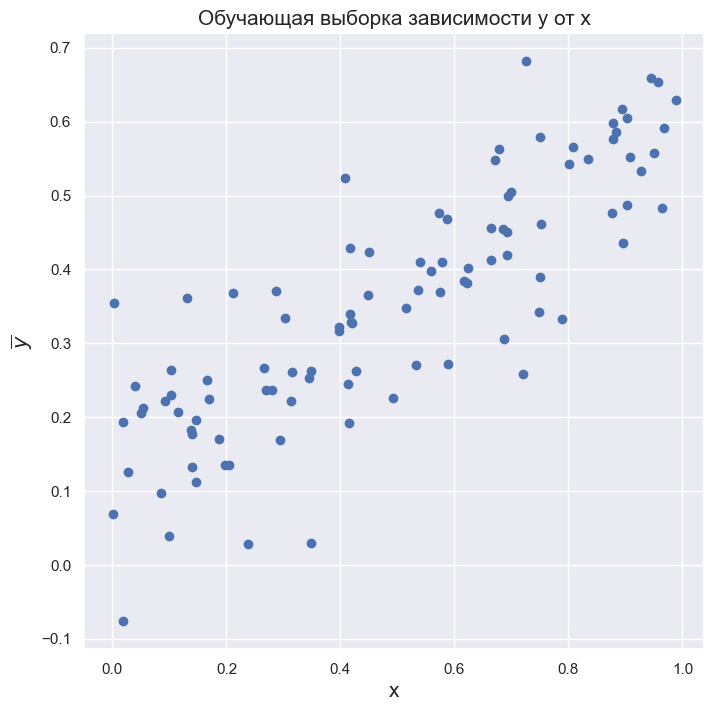

In [13]:
np.random.seed(1)
X = np.random.uniform(0, 1, 100)
Y = X * 0.5 + 0.1 + np.random.randn(100) * 0.1

plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.title("Обучающая выборка зависимости y от x", size=15)
plt.xlabel("x", size=15)
plt.ylabel(r'$\overline{y}$', size=15)
plt.show()

Обучим линейную регрессию, и посмотрим как регуляризация влияет на качество модели. В реализации библиотеки sklearn коэффициент регуляризации задаётся параметром alpha

In [14]:
from sklearn.linear_model import Ridge

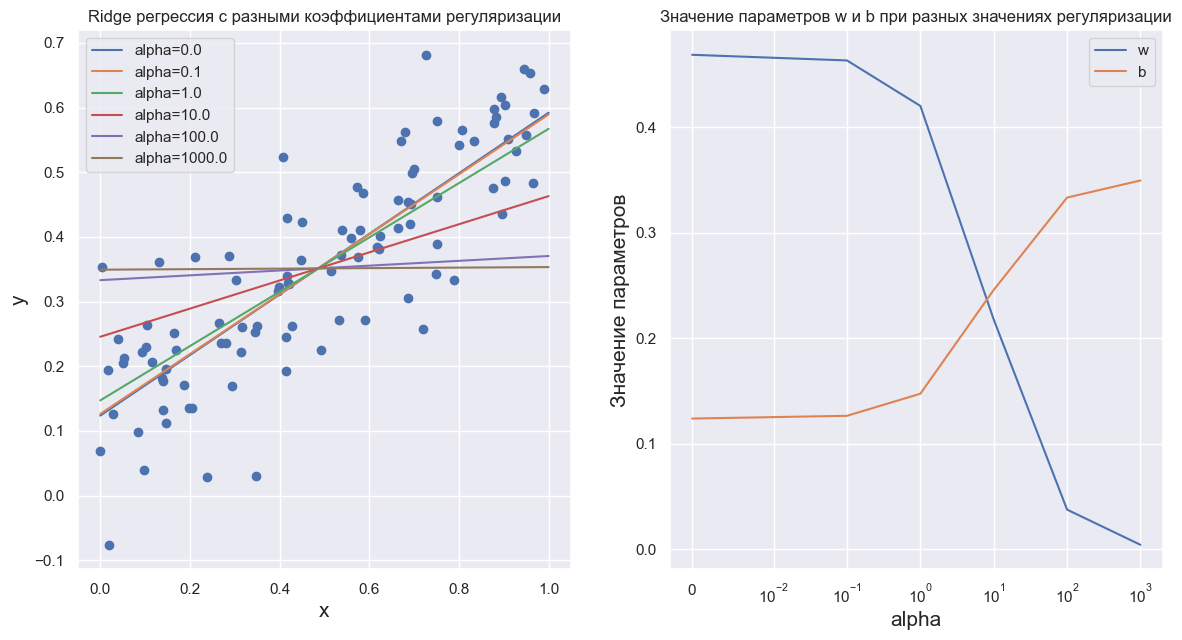

In [15]:
x_axis = np.linspace(0, 1, 200)
fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].scatter(X, Y)

w = []
b = []

alphas = [0.0, 0.1, 1.0, 10.0, 100.0, 1000.0]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X[:, None], Y)
    pred = reg.predict(x_axis[:, None])
    w.append(reg.coef_[0])
    b.append(reg.intercept_)
    axs[0].plot(x_axis, pred, label="alpha=" + str(alpha))

axs[0].legend()
axs[0].set_xlabel("x", size=15)
axs[0].set_ylabel("y", size=15)
axs[0].set_title("Ridge регрессия с разными коэффициентами регуляризации")
axs[1].plot(alphas, w, label="w")
axs[1].plot(alphas, b, label="b")
axs[1].set_xlabel("alpha", size=15)
axs[1].set_ylabel("Значение параметров", size=15)
axs[1].set_title("Значение параметров w и b при разных значениях регуляризации")
axs[1].set_xscale("symlog", linthresh=0.01)
axs[1].legend()
plt.show()

In [16]:
b

[np.float64(0.12369572541489088),
 np.float64(0.12629210109295894),
 np.float64(0.14724230721244977),
 np.float64(0.2456367935566342),
 np.float64(0.33317025968164754),
 np.float64(0.3493699249824063)]

### **Вопрос 1** (1 балл)

Как зависят параметры модели от константы регуляризации? А качество?



***Ваш ответ здесь***

Чем больше коэффициент регуляризации альфа, тем больше штраф за ошибку. С увеличением альфа веса сжимаются и модель становится менее чувствительной , из-за чего хуже предсказания.
b немного увеличивается чтобы в каких-то случаях компенсировать сильно уменьшиеся веса

### **Вопрос 2** (1 балл)

Почему при обучении линейных моделей, коэффициент $b$ не регуляризуется? Дайте ответ с опорой на лекции и увиденные картинки.

***Ваш ответ здесь***

Потому что коэффициент постоянен и является константой. b - значение пересечения с осью абсцисс, оно не штрафуется и только двигает график вверх либо вниз.

------

Казалось бы, зачем нам эта глупая регуляризация?! реально зачем?

Давайте рассмотрим ещё один модельный пример. Представим, что кто-то добавил в данные к переменной $x$ её же умноженную на $2$. То есть, теперь у нас два признака $x_1$ и $x_2 = 2 \cdot x_1$. Тогда, $y = c \cdot 0.5 \cdot x_1 + \frac{1 - c}{4} \cdot x_2 + 0.1$, где $c$ любое сколь угодно большое вещественное число. Это может привести к тому, что без регуляризации мы рискуем выучить очень большие веса!

In [17]:
np.random.seed(1)
X2 = np.hstack((X[:, None], 2 * X[:, None]))
Y2 = X2[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X2, Y2)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 0.10062207382659173 	w2: 0.20124414765318352


Коэффициенты адекватные, хотя и не похожи на изначальную зависимость. Но что, если $x_2$ будет равняться $3 \cdot x_1$?

In [18]:
np.random.seed(1)
X3 = np.hstack((X[:, None], 3 * X[:, None]))
Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X3, Y3)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 20443435586638.3 	w2: -6814478528879.264


Тут вот уже не повезло. Коэффициенты случайно выучились неадекватно большими. Создадим обучающую выборку из того же распределения и посмотрим на качество

In [19]:
np.random.seed(2)
X3_test = np.random.uniform(0, 1, 100)
X3_test = np.hstack((X3_test[:, None], 3 * X3_test[:, None]))
Y3_test = X3_test[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

Y3_test_pred = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
print("MSE loss: %.4f" % np.mean((Y3_test_pred - Y3_test) ** 2))

MSE loss: 0.0197


Вроде бы неплохое, но что если мы добавим ко второму признаку одного из объектов небольшой шум?

In [20]:
X3_test[0, 1] = X3_test[0, 1] + 1e-10
Y3_test_pred_noisy = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
print("MSE loss:", np.mean((Y3_test_pred_noisy - Y3_test) ** 2))
print("Предсказание для первого объекта с шумом: ", Y3_test_pred_noisy[0])
print("Предсказание для первого объекта без шума: ", Y3_test_pred[0])

MSE loss: 4641.811179703668
Предсказание для первого объекта с шумом:  -681.03515625
Предсказание для первого объекта без шума:  0.4140625


Как видим, даже небольшое изменение в данных, приводит к резкому падению качества.

### **Вопрос 3** (2 балла)
Рассмотрите больше примеров с двумя признаками $x_1$ и $x_2$, где $x_2$ линейно зависит от $x_1$. Убедитесь, что линейная модель без регуляризации крайне неустойчива.

In [21]:
np.random.seed(1)
X = np.random.uniform(0, 1, 100)
exmp = [(X, 10*X), (X, 0.5*X)]

In [22]:
def regularization(exmp, alpha):
    print(f"Значение регуляризации: {alpha}")
    for i in range(len(exmp)):

        e = exmp[i]
        x1 = e[0]
        x2 = e[1]
        x_e = np.hstack((x1[:, None], x2[:, None]))
        y_e = x1 * 0.5 + 0.1 + np.random.randn(100) * 0.1
        reg = Ridge(alpha=alpha) # Это без регуляризации
        reg.fit(x_e, y_e)
        np.random.seed(2)
        x_test = np.random.uniform(0, 1, 100)
        x_test = np.hstack((x_test[:, None], 3 * x_test[:, None]))
        y_test = x_test[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1
        y_test_pred = np.sum(reg.coef_[None] * x_test + reg.intercept_, axis=1)
        print("Предсказание для первого объекта без шума: ", y_test_pred[0])
        print("Пример номер", i+1, "MSE loss: %.4f" % np.mean((y_test_pred - y_test) ** 2))
        x_test_shum = x_test.copy() # я люблю питон
        x_test_shum[0, 1] = x_test_shum[0, 1] + 1e-10
        y_test_pred_shum = np.sum(reg.coef_[None] * x_test_shum + reg.intercept_, axis=1)
        print("Предсказание для первого объекта с шумом: ", y_test_pred_shum[0])


        y_test_pred = np.sum(reg.coef_[None] * x_test + reg.intercept_, axis=1)

        print("Пример номер", i+1, "MSE loss: %.4f" % np.mean((y_test_pred_shum - y_test) ** 2))
        print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
        print("---------")


In [23]:
regularization(exmp,0)


Значение регуляризации: 0
Предсказание для первого объекта без шума:  1674359765960.9238
Пример номер 1 MSE loss: 4162620822968371767148544.0000
Предсказание для первого объекта с шумом:  1674359765906.062
Пример номер 1 MSE loss: 4162620822966535668629504.0000
w1: 5486170849818.398 	w2: -548617084981.7928
---------
Предсказание для первого объекта без шума:  0.6076714353681824
Пример номер 2 MSE loss: 0.1077
Предсказание для первого объекта с шумом:  0.6076714353876824
Пример номер 2 MSE loss: 0.1077
w1: 0.390000120579663 	w2: 0.19500006028983155
---------


In [24]:
regularization(exmp, 0.1)

Значение регуляризации: 0.1
Предсказание для первого объекта без шума:  0.2478603094161584
Пример номер 1 MSE loss: 0.0333
Предсказание для первого объекта с шумом:  0.24786030942098458
Пример номер 1 MSE loss: 0.0333
w1: 0.004826182847550177 	w2: 0.048261828475688856
---------
Предсказание для первого объекта без шума:  0.6081162479756214
Пример номер 2 MSE loss: 0.1073
Предсказание для первого объекта с шумом:  0.608116247994943
Пример номер 2 MSE loss: 0.1073
w1: 0.3864332751178741 	w2: 0.19321663755893675
---------


In [25]:
regularization(exmp, 10)

Значение регуляризации: 10
Предсказание для первого объекта без шума:  0.2524273659459435
Пример номер 1 MSE loss: 0.0326
Предсказание для первого объекта с шумом:  0.25242736595071574
Пример номер 1 MSE loss: 0.0326
w1: 0.004772218820442952 	w2: 0.04772218820443086
---------
Предсказание для первого объекта без шума:  0.6310159125917165
Пример номер 2 MSE loss: 0.1042
Предсказание для первого объекта с шумом:  0.6310159126018569
Пример номер 2 MSE loss: 0.1042
w1: 0.20280636471477037 	w2: 0.10140318235738513
---------


Вес для первого примера при отсутсвии регуляризации желает лучшего конечно, поэтому регуляризация нужна! Также с увеличением регуляризации уменьшается MSE и точность предсказывания

-----

Теперь добавим регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

### **Вопрос 4 (со звёздочкой)** (2 балла)

Как думаете, почему отношение между весами постоянно? (подсказка, необходимо выписать функцию потерь и посчитать производные по весам)

**Ваш ответ здесь**
потому что.

-----
<font color="white" style="opacity:0.2023"></font>

Заметим, что при $l_2$ регуляризации в данном примере веса получились пропорциональны значениям признаков. При этом, мы знаем, что оба признака взаимно однозначны, и прогноз можно делать только по одному из них. Для этого придумана $l_1$ регуляризация. В билиотеке sklearn линейная регрессия с $l_1$ регуляризацией реализована в классе Lasso

### **Вопрос 5**  (2 балла)

Почему в нашем примере $l_1$ регуляризация приведёт к разреживанию весов? (подсказка, нужно опять подсчитать производную, но обратите внимание на дифференцируемость модуля).

**Ваш ответ здесь** потому что потому

-----

Добавим $l_1$ регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [26]:
from sklearn.linear_model import Lasso

In [27]:
reg = Lasso(alpha=1., max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 1.")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.1, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.1")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.01, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.01")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.0001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.0001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.00001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

Веса, при alpha = 1.
w1: 0.0 	w2: 0.0

Веса, при alpha = 0.1
w1: 0.0 	w2: 0.03950662786303303

Веса, при alpha = 0.01
w1: 0.0 	w2: 0.15488377352619098

Веса, при alpha = 0.001
w1: 0.0 	w2: 0.1664214880925068

Веса, при alpha = 0.0001
w1: 0.0 	w2: 0.1675752595491384

Веса, при alpha = 0.00001
w1: 0.4261538129756522 	w2: 0.025639365702917725



### **Вопрос 6** (2 балла)

Почему в итоге при $\alpha = 0.00001$ получились веса не равные нулю?

**Подсказка** Обратите внимание на то, каким странным получился вес $w_2$

**Ваш ответ здесь**

Чем больше коэф регуляризации, тем больше сжимаются весы. Поэтому видимо до этого w1 обнулялся из-за того что альфа было большим и видимо оно было не таким важным параметром(или возможно кореллировал с весом2). Но далее с уменьшением альфы у нас "повышается шанс" сохранения параметра, из-за чего вес1 и получается не нулевое значение, хотя на самом деле он неважен.

-----

В предущих блоках мы использовали модельные примеры, в которых $y$ зависел от $x$ линейно. Но так бывает далеко не всегда.

### **Вопрос 7** (2 балла)

 Придумайте, сгенерируйте и визуализируйте пример, в котором линейная регрессия будет плохо классифицировать данные.

Например если между Х и У вообще нет никакой корреляции, то есть У никак не зависит от Х.

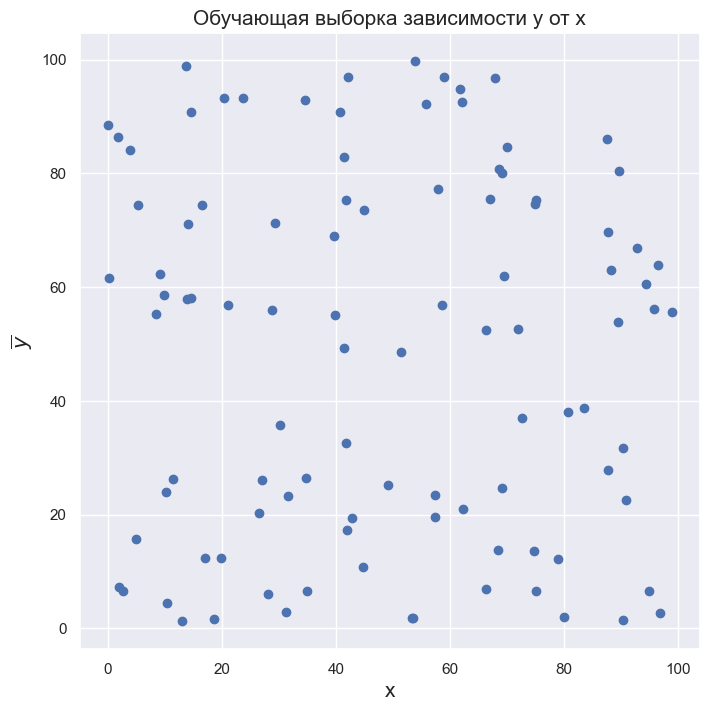

In [28]:
np.random.seed(1)
X = np.random.rand(100, 1) * 100
Y = np.random.rand(100, 1) * 100

plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.title("Обучающая выборка зависимости y от x", size=15)
plt.xlabel("x", size=15)
plt.ylabel(r'$\overline{y}$', size=15)
plt.show()

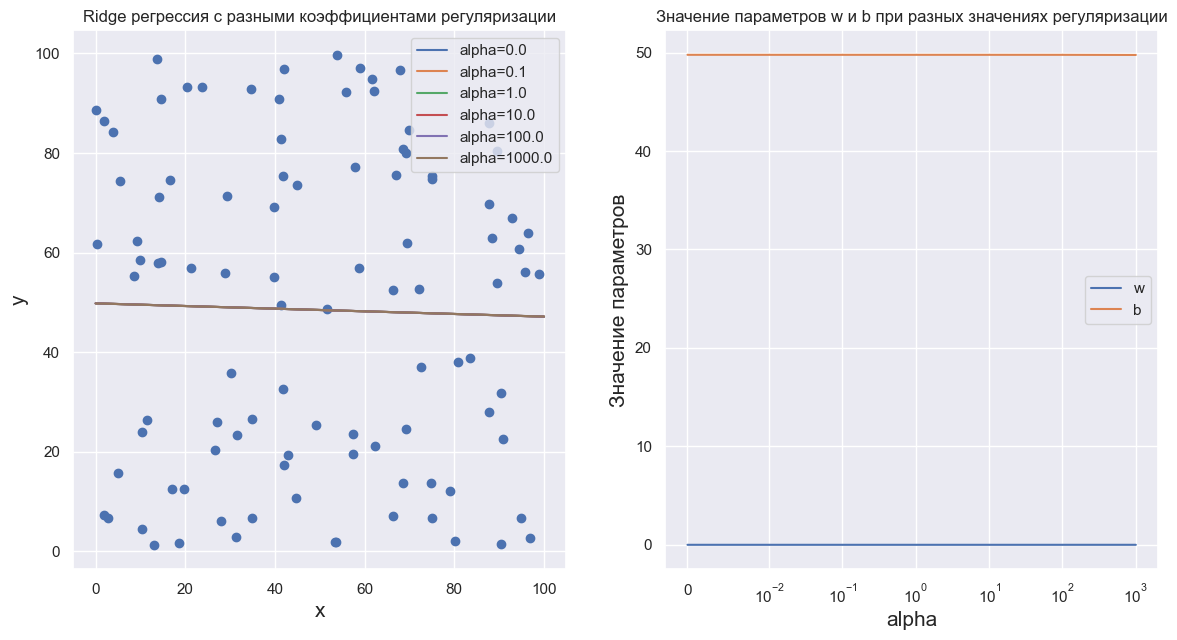

In [29]:
x_axis = np.linspace(0, 100, 200).reshape(-1, 1)
fig, axs = plt.subplots(figsize=(14, 7), ncols=2)

axs[0].scatter(X, Y)

w = []
b = []

alphas = [0.0, 0.1, 1.0, 10.0, 100.0, 1000.0]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X, Y.ravel())
    pred = reg.predict(x_axis)
    w.append(reg.coef_[0])
    b.append(reg.intercept_)
    axs[0].plot(x_axis, pred, label="alpha=" + str(alpha))

axs[0].legend()
axs[0].set_xlabel("x", size=15)
axs[0].set_ylabel("y", size=15)
axs[0].set_title("Ridge регрессия с разными коэффициентами регуляризации")

axs[1].plot(alphas, w, label="w")
axs[1].plot(alphas, b, label="b")
axs[1].set_xlabel("alpha", size=15)
axs[1].set_ylabel("Значение параметров", size=15)
axs[1].set_title("Значение параметров w и b при разных значениях регуляризации")
axs[1].set_xscale("symlog", linthresh=0.01)
axs[1].legend()

plt.show()


Как мы видим, ничего не спасает уже, если между Х и У нет связи

-------------

Попробуем обучить линейную регрессию c $l_1$ регуляризацией на специальном датасете из sklearn

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

Взглянем немножко на данные. Выведем средние значения каждого признака

In [31]:
with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
  print(X_train.mean(axis=0))

[ 3.871  28.668  5.438  1.097  1423.264  3.116  35.621 -119.558]


Нетрудно видеть, что масштаб у разных признаков сильно отличается. Это может приводить к разным неприятным эффектам. Подробнее эту проблему мы разберём в следующем задании.

In [32]:
from sklearn.preprocessing import StandardScaler

### **Вопрос 8** (2 балла)

Отмасштабируйте данные при помощи класса StandardScaler. Выведите средние значения и дисперсии признаков на обучающей и тестовой выборках.

**Замечание:** Результат положите в переменные X_train_scaled и X_test_scaled , чтобы последующий код был рабочим

In [33]:
#Ваш ответ

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
print("Mean Train:", X_train_scaled.mean(axis=0))
print("Variance Train:", X_train_scaled.var(axis=0)) #
print("Mean Test:", X_test_scaled.mean(axis=0))
print("Variance Test:", X_test_scaled.var(axis=0))

Mean Train: [-6.41568747e-15  3.04297008e-17  1.19356928e-14 -2.24111673e-16
 -9.92077406e-17 -1.22618655e-15 -3.45598411e-14  2.75281213e-14]
Variance Train: [1. 1. 1. 1. 1. 1. 1. 1.]
Mean Test: [-0.00035668 -0.00765929 -0.01236862 -0.00116823  0.00647308 -0.01223974
  0.01619917 -0.01925281]
Variance Test: [1.04232987 0.98581472 1.33209427 1.21021935 0.96038642 0.06195302
 1.00896771 1.01131205]


Измерим качество прогнозатора. Будем использовать метрику RMSE.

In [35]:
from sklearn.metrics import root_mean_squared_error

In [36]:
reg = Lasso(alpha=0.5)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
# print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred, squared=False))
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.9780


### **Вопрос 9** (1 балл)

В чем плюсы RMSE по сравнению с MSE?

**Ваш ответ здесь**

Помогает интерпретировать результат в тех же единицах, как и исходные данные, тогда как в MSE сложно понять что означает квадрат.

https://datascience.stackexchange.com/questions/66712/reason-for-generally-using-rmse-instead-of-mse-in-linear-regression

и еще что-то такое

### **Вопрос 10** (1 балл)

Насколько удачно измерять качество модели с помощью RMSE с учетом того, что оптимизация линейной регрессии происходит по MSE?

**Ваш ответ здесь**

-----

Проанализируем ошибку на обучающей выборке.

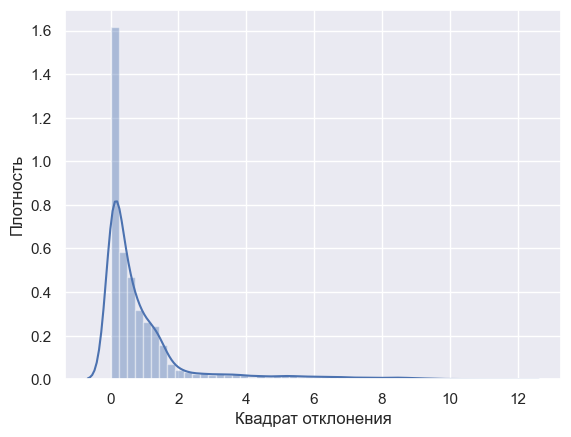

In [37]:
error = (y_train - reg.predict(X_train_scaled)) ** 2
sns.distplot(error)
plt.xlabel("Квадрат отклонения")
plt.ylabel("Плотность")
plt.show()

Как видно, есть несколько объектов, на которых модель ошибается сильно. Давайте посмотрим на качество, если удалить эти объекты из обучающей выборки.

In [38]:
mask = (error < np.quantile(error, 0.99))
reg.fit(X_train_scaled[mask], y_train[mask])
y_pred = reg.predict(X_test_scaled)
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.9717


Таким образом, можно улучшить качество линейной регрессии, если удалить из обучающей выборки выбросы. В данном примере, качество улучшилось не так сильно, но бывают ситуации, когда чистка обучающей выборки по ошибке, приводит к сильному улучшению качества.

Обратим внимание на веса модели. Почти все из них занулились! Это большое преимущество, так как разреживание весов позволяет отбирать нужные признаки, делая модель более лёгкой.

In [39]:
reg.coef_

array([ 0.30658523,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ])

А теперь обучим с $l_2$ регуляризацией.

In [40]:
reg = Ridge(alpha=0.5)
reg.fit(X_train_scaled, y_train)
print(reg.coef_)

[ 0.82540051  0.12701227 -0.24066504  0.27101941 -0.00317096 -0.04117445
 -0.87312407 -0.84556157]


Как видим, веса не разрежены, хотя и есть очень маленькие значения

### **Вопрос 11** (2 балла)

Приведите пример, когда линейная регрессия с $l_2$ регуляризацией гарантированно занулит какой-нибудь признак?

**Ваш ответ здесь**

Но вы же говорили что такое невозможно... Чисто геометрически... Может быть когда У - константа, поэтому Y = b, и поэтому веса не нужны? + У нас применяется StandardScaler и поэтому по идее должно сработать??

------

При обучении мы заранее не знаем, какое значение параметра регуляризации даст наилучшие результаты. Подобрать оптимальные параметры можно с помощью кросс-валидации. В sklearn есть несколько классов со встроенной кросс-валидацией

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Воспользуемся классом GridSearch для перебора параметров по сетке.

* Для линейных регрессий перебирается параметр $\alpha$ - сила регуляризации. Обычно важнее перебирать порядок этого параметра, а не точное его значение. В силу этого сетку перебора будет удобно сделать через функцию np.logspace, например np.logspace(-3, 3, 10).

### Вопрос 12 (2 балла)

Воспользуйтесь классом [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) и подберите константы регуляризации для Lasso и Ridge регрессий. Измерьте качество обученных моделей. Сетка перебора должна быть логарифмической, из хотя бы 10 значений


**Подсказка:**
* Пример, как можно перебирать параметры в GridSearch у вложенных [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) можно [найти вот тут](https://www.kaggle.com/code/ilnazsalimov/gridsearch-with-pipeline)
* Обратите внимание, что сейчас мы сразу заносим масштабирование в Pipeline - чтобы иметь возможность сразу вызываться от оригинальных X_train, а также чтобы не было утечки данных при использовании GridSearch
* В GridSearch в качестве скоринговой функции можно подавать строковое описание функции из sklearn, которое [можно посмотреть вот тут](https://scikit-learn.org/stable/modules/model_evaluation.html), а также саму скоринговую функцию из sklearn или собственную функцию, сделанную [через make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer)

**Замечание:** Итоговое качество должно быть не больше 0.73 RMSE.

In [42]:
import numpy as np

In [43]:
grid = np.logspace(2, 3, num = 15)

In [ ]:
model_lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("regr", Lasso())
])

model_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("regr", Ridge())
])

lasso_cv = GridSearchCV(
    model_lasso,
    cv=5,
    scoring="neg_root_mean_squared_error",
    param_grid = {"regr__alpha": grid}
)

ridge_cv = GridSearchCV(
    model_ridge,
    cv=5,
    scoring="neg_root_mean_squared_error",
    param_grid = {"regr__alpha": grid}

)

lasso_cv.fit(X_train, y_train)
ridge_cv.fit(X_train, y_train)

print("Best Lasso alpha:", lasso_cv.best_params_)
print("Best Ridge alpha:", ridge_cv.best_params_)

y_pred_lasso = lasso_cv.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)

rmse_lasso = root_mean_squared_error(y_test, y_pred_lasso)
rmse_ridge = root_mean_squared_error(y_test, y_pred_ridge)

print("Lasso RMSE:", rmse_lasso)
print("Ridge RMSE:", rmse_ridge)


# Your code: фитим модели и измеряем качество на тесте
# Можно вызывать predict прямо от обученных lasso_cv и ridge_cv

Best Lasso alpha: {'regr__alpha': np.float64(100.0)}
Best Ridge alpha: {'regr__alpha': np.float64(100.0)}
Lasso RMSE: 1.1590523935843056
Ridge RMSE: 0.7252872579177325


Убедимся, что Lasso всё ещё зануляет признаки (скорее всего модель Lasso занулила хотя бы один).

In [48]:
lasso_cv.best_estimator_.named_steps["regr"].coef_

array([ 0.,  0.,  0., -0., -0., -0., -0., -0.])

Она занулила все, ну ладно:(